##Kaggle Dataset

In [ ]:
from google.colab import files
files.upload()   # upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rusticbyte","key":"acc835fbd3b1675138d743f66139bf15"}'}

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
#KGAT_979cb254aaed0d6bf748d3f221095ef6

In [ ]:
!kaggle datasets download -d mashlyn/online-retail-ii-uci
!unzip *.zip

Dataset URL: https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci
License(s): CC0-1.0
  0% 0.00/14.5M [00:00<?, ?B/s]
100% 14.5M/14.5M [00:00<00:00, 942MB/s]
Archive:  online-retail-ii-uci.zip
  inflating: online_retail_II.csv    


##MAIN

In [ ]:
import pandas as pd
df = pd.read_csv("online_retail_II.csv")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
#df.describe()
df.info()
#df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [ ]:
df = df.dropna(subset=["Customer ID"])

# Drop rows where Description is missing
df = df.dropna(subset=["Description"])

# Convert Customer ID to integer
df["Customer ID"] = df["Customer ID"].astype(int)

# After cleaning
df.shape
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0


In [ ]:
#df['InvoiceDate']=df['InvoiceDate'].astype('datetime64[ns]')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  int64         
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 56.6+ MB


In [ ]:
df = df[~df['Invoice'].astype(str).str.startswith('C')]
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 805620 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805620 non-null  object        
 1   StockCode    805620 non-null  object        
 2   Description  805620 non-null  object        
 3   Quantity     805620 non-null  int64         
 4   InvoiceDate  805620 non-null  datetime64[ns]
 5   Price        805620 non-null  float64       
 6   Customer ID  805620 non-null  int64         
 7   Country      805620 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 55.3+ MB


In [ ]:
df['TotalPrice']=df['Quantity']*df['Price']
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [ ]:
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
reference_date


Timestamp('2011-12-10 12:50:00')

In [ ]:
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,   # Recency
    'Invoice': 'nunique',                                       # Frequency
    'TotalPrice': 'sum'                                         # Monetary
})


In [ ]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,326,12,77556.46
12347,2,8,5633.32
12348,75,5,2019.40
12349,19,4,4428.69
12350,310,1,334.40


In [ ]:
rfm = rfm[rfm['Monetary'] > 0]
rfm.describe()

,Recency,Frequency,Monetary
count,5878.000000,5878.000000,5878.000000
mean,201.331916,6.289895,3018.616737
std,209.338707,13.015651,14737.731040
min,1.000000,1.000000,2.950000
25%,26.000000,1.000000,348.762500
50%,96.000000,3.000000,898.915000
75%,380.000000,7.000000,2307.090000
max,739.000000,398.000000,608821.650000


In [ ]:
import numpy as np

rfm_log = rfm.copy()
rfm_log['Recency'] = np.log1p(rfm_log['Recency'])
rfm_log['Frequency'] = np.log1p(rfm_log['Frequency'])
rfm_log['Monetary'] = np.log1p(rfm_log['Monetary'])


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)
rfm_scaled = pd.DataFrame(rfm_scaled,
                          index=rfm_log.index,
                          columns=rfm_log.columns)
rfm_scaled.head()


,Recency,Frequency,Monetary
Customer ID,,,
12346,0.856701,1.254436,3.186625
12347,-2.151979,0.800119,1.297127
12348,-0.079138,0.299175,0.558100
12349,-0.935308,0.073920,1.123790
12350,0.824527,-1.058140,-0.735888


In [ ]:
wcss = []  # within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

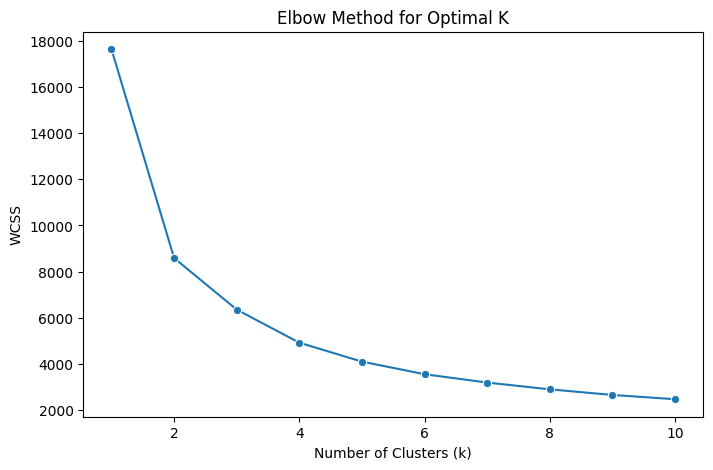

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(x=list(range(1,11)), y=wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()


In [ ]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(rfm_scaled)
rfm['Cluster'] = kmeans.labels_
rfm.head()


,Recency,Frequency,Monetary,Cluster
Customer ID,,,,
12346,326,12,77556.46,1
12347,2,8,5633.32,1
12348,75,5,2019.40,3
12349,19,4,4428.69,2
12350,310,1,334.40,0


In [ ]:
cluster_summary = rfm.groupby('Cluster').mean().round(2)
cluster_summary


,Recency,Frequency,Monetary
Cluster,,,
0,394.66,1.41,344.06
1,25.51,19.89,11386.98
2,28.51,3.01,854.86
3,213.37,5.39,2139.77


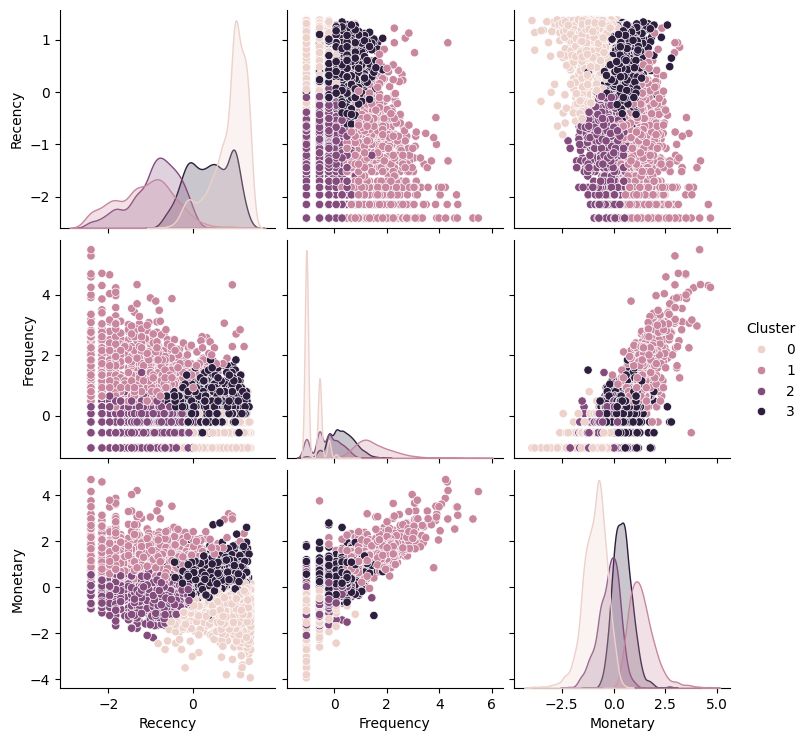

In [ ]:
sns.pairplot(rfm_scaled.join(rfm['Cluster']), hue='Cluster')
plt.show()


In [ ]:
# Get cluster centers (in scaled form)
centers_scaled = kmeans.cluster_centers_

# Convert back to log-transformed RFM space
centers_log = scaler.inverse_transform(centers_scaled)

# Convert log back to original values
centers = np.expm1(centers_log)

centers_df = pd.DataFrame(centers, columns=["Recency", "Frequency", "Monetary"])
centers_df["Cluster"] = range(0, k)
centers_df

,Recency,Frequency,Monetary,Cluster
0,334.780327,1.340669,262.781899,0
1,13.779679,15.287078,6091.256170,1
2,20.553317,2.696153,671.853683,2
3,159.651270,4.915370,1686.061512,3


/tmp/ipython-input-1285788504.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=rfm['Cluster'], palette='viridis')


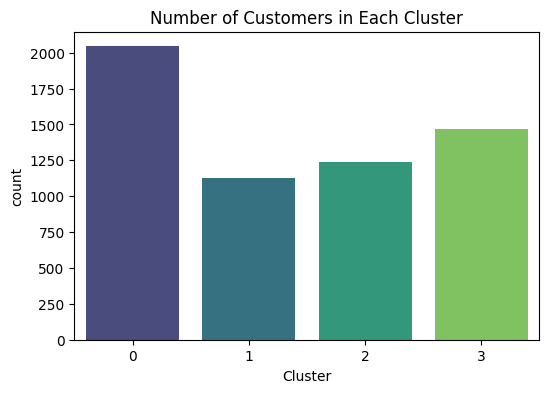

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=rfm['Cluster'], palette='viridis')
plt.title("Number of Customers in Each Cluster")
plt.show()


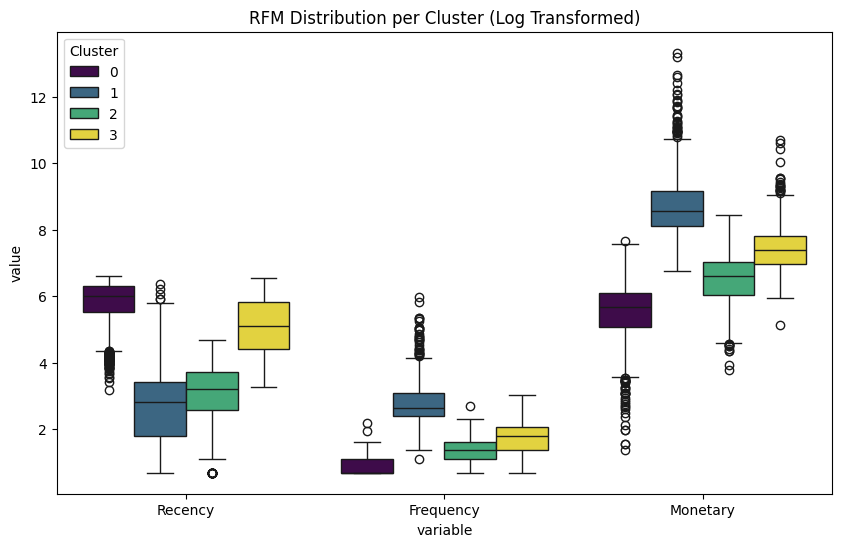

In [ ]:
rfm_log_plot = rfm_log.copy()
rfm_log_plot["Cluster"] = rfm["Cluster"]

rfm_melt_log = rfm_log_plot.reset_index().melt(
    id_vars=["Customer ID", "Cluster"],
    value_vars=["Recency", "Frequency", "Monetary"]
)

plt.figure(figsize=(10,6))
sns.boxplot(data=rfm_melt_log, x='variable', y='value', hue='Cluster', palette='viridis')
plt.title("RFM Distribution per Cluster (Log Transformed)")
plt.show()


In [ ]:
label_map = {
    3: "VIP / Champions",
    2: "Loyal Customers",
    1: "Regular Buyers",
    0: "At-Risk / Low Value"
}

rfm['Cluster_Label'] = rfm['Cluster'].map(label_map)
rfm.head()


,Recency,Frequency,Monetary,Cluster,Cluster_Label
Customer ID,,,,,
12346,326,12,77556.46,1,Regular Buyers
12347,2,8,5633.32,1,Regular Buyers
12348,75,5,2019.40,3,VIP / Champions
12349,19,4,4428.69,2,Loyal Customers
12350,310,1,334.40,0,At-Risk / Low Value


In [ ]:
summary = rfm.groupby("Cluster_Label")[["Recency","Frequency","Monetary"]].mean().round(2)
summary


,Recency,Frequency,Monetary
Cluster_Label,,,
At-Risk / Low Value,394.66,1.41,344.06
Loyal Customers,28.51,3.01,854.86
Regular Buyers,25.51,19.89,11386.98
VIP / Champions,213.37,5.39,2139.77


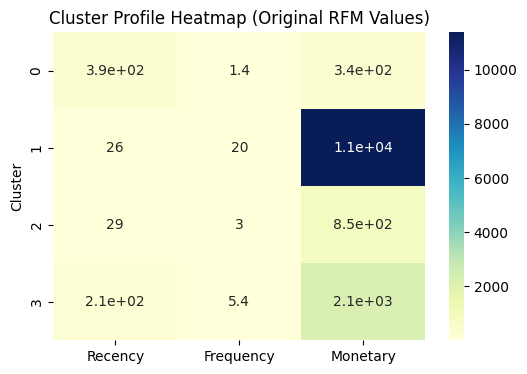

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(
    rfm.groupby("Cluster")[["Recency","Frequency","Monetary"]].mean().round(2),
    annot=True,
    cmap="YlGnBu"
)
plt.title("Cluster Profile Heatmap (Original RFM Values)")
plt.show()


In [ ]:
rfm.to_csv("customer_segments.csv", index=True)